Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Krish\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Krish\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Krish\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


## Datasets

In [2]:
dataset = pd.read_csv('employee_having_car.csv')

In [3]:
dataset

,Unnamed: 0,Age,Gender,Salary,Car
0,0,19,M,30800,0
1,1,35,M,32000,0
2,2,26,F,59600,0
3,3,27,F,76400,0
4,4,19,M,99200,0
...,...,...,...,...,...
375,375,46,F,46400,1
376,376,46,F,96800,0
377,377,42,F,71600,0
378,378,41,M,112400,1


Binary Encoding

In [4]:
dataset['Gender'] = dataset['Gender'].replace(to_replace=['M','F'], value=[1,0])

Features and Labels

In [5]:
X = dataset.iloc[:, [1,2,3]].values

In [6]:
X[:10]

array([[    19,      1,  30800],
       [    35,      1,  32000],
       [    26,      0,  59600],
       [    27,      0,  76400],
       [    19,      1,  99200],
       [    27,      1,  77600],
       [    27,      0, 108800],
       [    32,      0, 188000],
       [    25,      1,  47600],
       [    35,      0,  86000]], dtype=int64)

In [7]:
X.shape

(380, 3)

In [8]:
y = dataset.iloc[:, -1].values

In [9]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [10]:
X.shape

(380, 3)

In [11]:
y.shape

(380,)

feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X = scaler.fit_transform(X)

In [14]:
print(X[:10])

[[-1.74324685  1.02667135 -1.53470083]
 [-0.20538544  1.02667135 -1.50522614]
 [-1.07043248 -0.97402153 -0.82730815]
 [-0.97431614 -0.97402153 -0.41466242]
 [-1.74324685  1.02667135  0.14535679]
 [-0.97431614  1.02667135 -0.38518773]
 [-0.97431614 -0.97402153  0.38115435]
 [-0.49373445 -0.97402153  2.32648422]
 [-1.16654882  1.02667135 -1.1220551 ]
 [-0.20538544 -0.97402153 -0.17886486]]


Splitting the dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [17]:
print(X_train[:10])

[[-1.64713051 -0.97402153  0.32220496]
 [ 1.33247597 -0.97402153  1.8548891 ]
 [ 0.46742893 -0.97402153  0.26325557]
 [ 0.75577794 -0.97402153 -1.44627675]
 [ 0.85189428 -0.97402153 -1.44627675]
 [ 2.19752302  1.02667135  0.35167965]
 [ 0.46742893  1.02667135 -0.50308651]
 [ 2.00529034 -0.97402153 -1.41680205]
 [-1.64713051 -0.97402153 -1.03363102]
 [ 0.17907991  1.02667135  0.17483148]]


In [18]:
X_train.shape

(304, 3)

In [19]:
X_test.shape

(76, 3)

In [20]:
y_train.shape

(304,)

In [21]:
y_test.shape

(76,)

## Model Setup

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(40, input_dim=3, activation='relu'))
model.add(Dense(1,activation='sigmoid'))   # softmax

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


## Training

In [24]:
model.compile(loss='bce', optimizer='adam', metrics=['accuracy'])  # categorical_crossentropy

In [25]:
hist = model.fit(x = X_train, y = y_train, batch_size=16, validation_data=(X_test,y_test), epochs=100,verbose=1)

Epoch 1/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6336 - accuracy: 0.6743 - val_loss: 0.5943 - val_accuracy: 0.7237
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7862 - val_loss: 0.5452 - val_accuracy: 0.7895
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8322 - val_loss: 0.5038 - val_accuracy: 0.8158
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.8586 - val_loss: 0.4718 - val_accuracy: 0.8289
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8586 - val_loss: 0.4444 - val_accuracy: 0.8553
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8520 - val_loss: 0.4224 - val_accuracy: 0.8553
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8618 - val_loss: 0.4015 - val_accuracy: 0.8553
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8947 - val_loss: 0.2325 - val_accuracy: 0.9211
Epoch 60/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.8947 - val_loss: 0.2319 - val_accuracy: 0.9211
Epoch 61/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8947 - val_loss: 0.2313 - val_accuracy: 0.9211
Epoch 62/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.8947 - val_loss: 0.2309 - val_accuracy: 0.9211
Epoch 63/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.8947 - val_loss: 0.2309 - val_accuracy: 0.9211
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.8947 - val_loss: 0.2304 - val_accuracy: 0.9211
Epoch 65/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8947 - val_loss: 0.2292 - val_accuracy: 0.9211
Epoch 

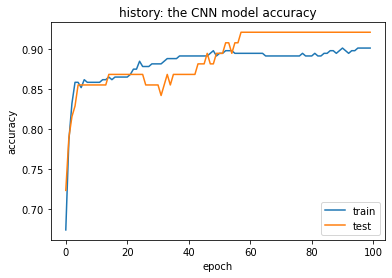

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

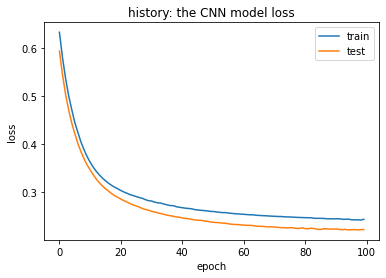

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Evaluating Model

Predicting on Test data

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred = np.where(y_pred>0.5,1,0)

In [30]:
yy = list(zip(y_test, y_pred[:,0]))

yy[:10]

[(0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1)]

metrics

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix   

In [32]:
accuracy_score(y_test,y_pred)*100

92.10526315789474

In [33]:
cm = confusion_matrix(y_test, y_pred)

In [34]:
cm

array([[49,  3],
       [ 3, 21]], dtype=int64)

In [35]:
import seaborn as sns

<AxesSubplot:>

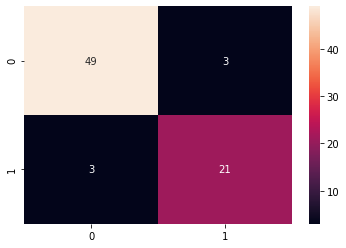

In [36]:
sns.heatmap(cm, annot=True)

## Predicting on single value

In [37]:
x1 = scaler.transform([[30, 1, 81000]])

In [38]:
y1 = model.predict(x1)  

In [39]:
print(y1[0][0])  #list value  

0.0043763365


## Save Model

In [40]:
model.save_weights('w234.h5')

reload model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential()
model2.add(Dense(40, input_dim=3, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))   # softmax

In [42]:
model2.compile(loss='bce', optimizer='adam', metrics=['accuracy']) # metrics=['accuracy','categorical_crossentropy']

In [43]:
model2.load_weights('w234.h5')

Exercise